# MULTIPLE LINEAR REGRESSION

### Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.


## Dataset Description:
The dataset consists of the following variables:


Age: Age in years


KM: Accumulated Kilometers on odometer


FuelType: Fuel Type (Petrol, Diesel, CNG)


HP: Horse Power


Automatic: Automatic ( (Yes=1, No=0))


CC: Cylinder Volume in cubic centimeters


Doors: Number of doors


Weight: Weight in Kilograms


Quarterly_Tax:
Price: Offer Price in EUROs


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
# 1. Load Dataset
df = pd.read_csv("ToyotaCorolla - MLR.csv")

Taskes:


1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.


In [ ]:
#basic EDA
print("First 5 rows of data:")
print(df.head()) #print first 5 rows
print("\nDataset Info:")
print(df.info()) #give information of data
print("\nSummary statistics:")
print(df.describe()) #give statistics infomartion of the data

First 5 rows of data:
   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   i

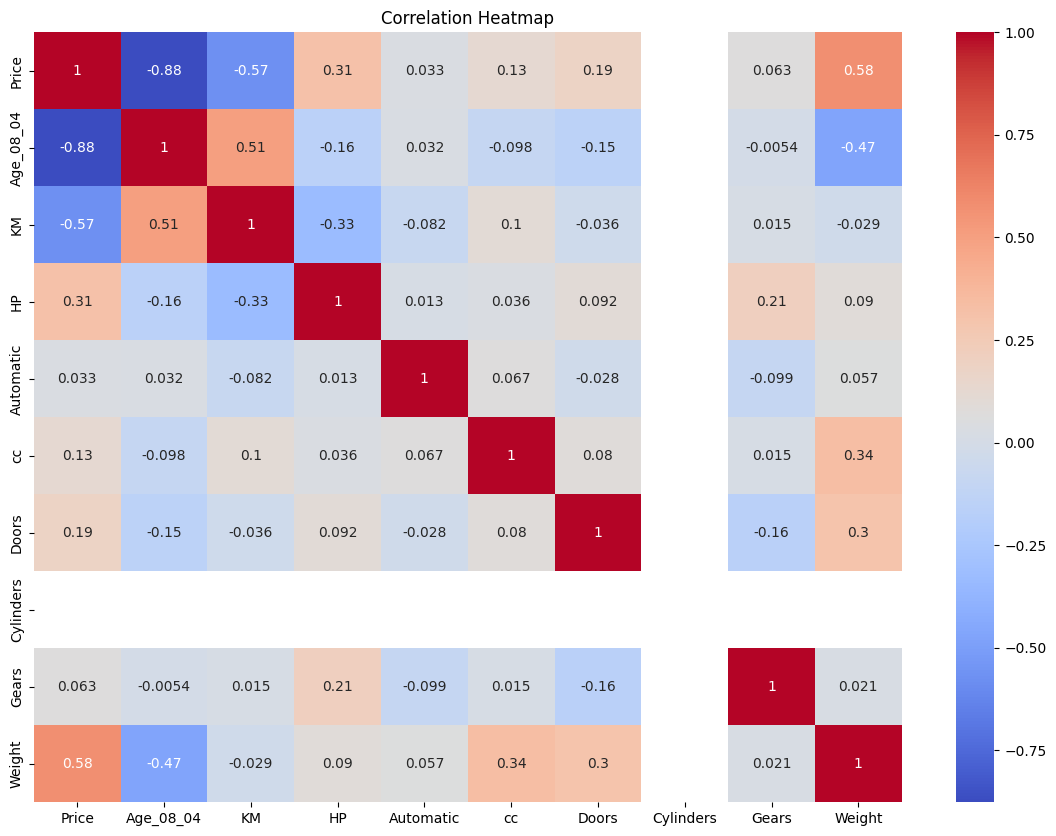

In [ ]:
# Correlation heatmap for numeric columns only
plt.figure(figsize=(14,10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm") #to getting to know about coorelation between features and target
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
df.drop(['Doors','Cylinders','Gears'], axis=1, inplace=True)
print(df.head())
## We droping these due low and not coorelation

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Weight
0  13500         23  46986    Diesel  90          0  2000    1165
1  13750         23  72937    Diesel  90          0  2000    1165
2  13950         24  41711    Diesel  90          0  2000    1165
3  14950         26  48000    Diesel  90          0  2000    1165
4  13750         30  38500    Diesel  90          0  2000    1170


In [ ]:
print(df.columns)

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Weight'],
      dtype='object')


In [ ]:
# drop the fuel_type column because we have categorical column as petrol and Diesel , either we can change into integers or we can drop , I am dropping that column
if 'Fuel_Type' in df.columns:
    df.drop('Fuel_Type', axis=1, inplace=True) #the reason because we have enough for our target so we droping that column

In [ ]:
#Features and target separation
X = df.drop("Price", axis=1)## X=features
y = df["Price"] ##Y=target without features

<Axes: >

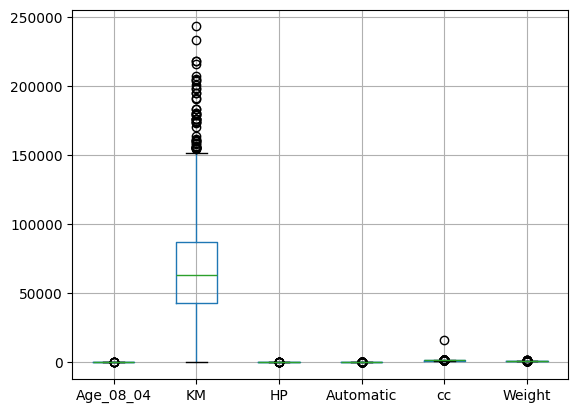

In [ ]:
X.boxplot()#for outliers

In [ ]:
def outlier_capping(df2, col): ##Removing Outliers
    Q1, Q3 = df2[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5* IQR, Q3 + 1.5  * IQR
    df2[col] = df2[col].clip(lower, upper)   # directly cap values using clip()

for col in X.select_dtypes(include=['int', 'float']).columns:
    outlier_capping(X, col)

<Axes: >

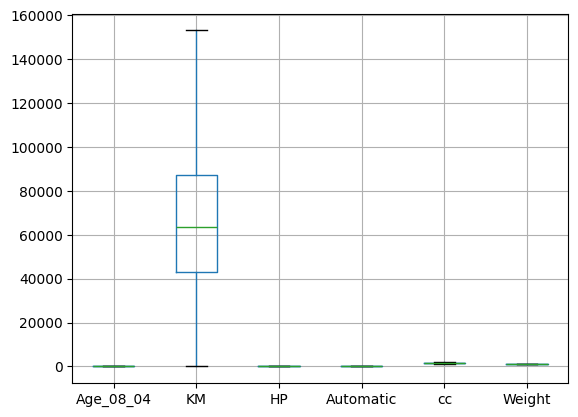

In [ ]:
X.boxplot()## after removing outliers

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [ ]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) ##test_size=20 and train will be 80

print(f"\nTraining samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")## shape of train and test


Training samples: 1148, Testing samples: 288


3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [ ]:
 ## Build 3 different Models

# Model 1:(Age, KM, HP)
features1 = ["Age_08_04", "KM", "HP"]
model1 = LinearRegression()
model1.fit(X_train[features1], y_train)

LinearRegression()

In [ ]:
# Model 2:(Age, KM, HP, CC, Weight)
features2 = ["Age_08_04", "KM", "HP", "cc", "Weight"]
model2 = LinearRegression()
model2.fit(X_train[features2], y_train)

LinearRegression()

In [ ]:
X.columns

Index(['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Weight'], dtype='object')

In [ ]:
# Model 3: Full Model (all features)
features3 = X.columns
model3 = LinearRegression()
model3.fit(X_train[features3], y_train)

LinearRegression()

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [ ]:
'''''To evaluate a regression model,
you use various performance metrics, with the most common being R-squared (R²),
 which indicates the proportion of variance in the dependent variable explained by the independent variables,
  and error metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE)
'''''

In [ ]:
# Model 1 Evaluation Here, we use R2 score, MSE , MAE
print("\nModel 1 (Age, KM, HP):")
y_pred_train1 = model1.predict(X_train[features1])
y_pred_test1  = model1.predict(X_test[features1])
print("Train R² :", r2_score(y_train, y_pred_train1))
print("Test R²  :", r2_score(y_test, y_pred_test1))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test1)))
print("Test MAE :", mean_absolute_error(y_test, y_pred_test1))


# Model 2 Evaluation
print("\nModel 2 (Age, KM, HP, CC, Weight):")
y_pred_train2 = model2.predict(X_train[features2])
y_pred_test2  = model2.predict(X_test[features2])
print("Train R² :", r2_score(y_train, y_pred_train2))
print("Test R²  :", r2_score(y_test, y_pred_test2))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test2)))
print("Test MAE :", mean_absolute_error(y_test, y_pred_test2))


# Model 3 Evaluation
print("\nModel 3 (Full Model):")
y_pred_train3 = model3.predict(X_train[features3])
y_pred_test3  = model3.predict(X_test[features3])
print("Train R² :", r2_score(y_train, y_pred_train3))
print("Test R²  :", r2_score(y_test, y_pred_test3))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test3)))
print("Test MAE :", mean_absolute_error(y_test, y_pred_test3))



Model 1 (Age, KM, HP):
Train R² : 0.8023622131052641
Test R²  : 0.797806025042757
Test RMSE: 1642.507690491347
Test MAE : 1125.4835267828846

Model 2 (Age, KM, HP, CC, Weight):
Train R² : 0.8424755461442922
Test R²  : 0.8309593468588867
Test RMSE: 1501.8234719377995
Test MAE : 1032.0810100127474

Model 3 (Full Model):
Train R² : 0.8424755461442922
Test R²  : 0.830959346858887
Test RMSE: 1501.8234719377988
Test MAE : 1032.0810100127471


5.Apply Lasso and Ridge methods on the model.

In [ ]:
# Ridge regression
## To evaluate Lasso and Ridge regression models,
## we use common regression metrics like Root Mean Squared Error (RMSE) and R-squared with cross-validation, or Mean Squared Error (MSE)/ Mean abosoultr erro (MAE)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

print("\nRidge Regression Evaluation:")
y_pred_train_ridge = ridge.predict(X_train[features3])
y_pred_test_ridge  = ridge.predict(X_test[features3])
print("Train R² :", r2_score(y_train, y_pred_train_ridge))
print("Test R²  :", r2_score(y_test, y_pred_test_ridge))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)))
print("Test MAE :", mean_absolute_error(y_test, y_pred_test_ridge))

 ## The alpha parameter controls the regularization strength. A larger alpha value increases the penalty and leads to stronger regularization her we gave 1.0

# Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

print("\nLasso Regression Evaluation:")
y_pred_train_lasso = lasso.predict(X_train[features3])
y_pred_test_lasso  = lasso.predict(X_test[features3])
print("Train R² :", r2_score(y_train, y_pred_train_lasso))
print("Test R²  :", r2_score(y_test, y_pred_test_lasso))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))
print("Test MAE :", mean_absolute_error(y_test, y_pred_test_lasso))



Ridge Regression Evaluation:
Train R² : 0.8424755461390897
Test R²  : 0.8309592289653966
Test RMSE: 1501.8239956437142
Test MAE : 1032.080612072082

Lasso Regression Evaluation:
Train R² : 0.8424755461333435
Test R²  : 0.8309592748823924
Test RMSE: 1501.8237916714706
Test MAE : 1032.0800656834301


In [ ]:
'''2: To fix multicollinearity, one can remove one of the highly correlated variables, combine them into a single variable,
or use a dimensionality reduction technique such as principal component analysis to reduce the number of variables while retaining most of the information. '''

Interview Questions:


1.What is Normalization & Standardization and how is it helpful?


2.What techniques can be used to address multicollinearity in multiple linear regression?


In [ ]:
'''' 1 : Normalization or Min-Max Scaling is used to transform features to be on a similar scale, usually 0 to 1,
Normalization is useful when there are no outliers as it cannot cope up with them.
## while Standardization transforms data to have a mean of 0 and a standard deviation of 1,
it translates the data to the mean vector of original data to the origin and squishes or expands the points if std is 1 respectively.
We can see that we are just changing mean and standard deviation to a standard normal distribution which is still normal thus the shape of the distribution is not affected.
Standardization does not get affected by outliers because there is no predefined range of transformed features ''''